<a href="https://colab.research.google.com/github/MoMahmoud8/SHAI/blob/main/ShAI_BootCamp_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load your dataset
df = pd.read_csv('//content/drive/MyDrive/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.shape

(148654, 13)

In [4]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [8]:
df[df['BasePay'].isna()]['Year'].value_counts()

2013    605
2014      4
Name: Year, dtype: int64

In [9]:
df[df['BasePay'].isna()]['JobTitle'].value_counts()

Transit Operator                  61
Commissioner 16.700c, No Pay      49
Recreation Director               22
Deputy Sheriff                    19
Assistant Recreation Director     14
                                  ..
Sr Statnry Eng, Wtr Treat Plnt     1
Sr District Atty Investigator      1
Personnel Clerk                    1
Senior Administrative Analyst      1
Deputy Chief 3                     1
Name: JobTitle, Length: 227, dtype: int64

In [10]:
df[df['Year']==2013].groupby('JobTitle')['BasePay'].mean()

JobTitle
ASR Senior Office Specialist      64617.594762
ASR-Office Assistant              38530.586667
Account Clerk                     45385.315862
Accountant I                      67838.413333
Accountant II                     69448.081818
                                      ...     
Wire Rope Cable Maint Sprv        95716.510000
Worker's Comp Supervisor 1        73682.390000
Worker's Compensation Adjuster    75965.776000
X-Ray Laboratory Aide             44876.745882
Youth Comm Advisor                33174.840000
Name: BasePay, Length: 1051, dtype: float64

In [11]:
# Calculate means for 2013
mean_2013 = df[df['Year'] == 2013].groupby('JobTitle')['BasePay'].mean()

# Calculate means for 2014
mean_2014 = df[df['Year'] == 2014].groupby('JobTitle')['BasePay'].mean()

# Fill null values in 'BasePay' for the year 2013 with the mean of each 'JobTitle' category
df.loc[(df['Year'] == 2013) & (df['BasePay'].isnull()), 'BasePay'] = df.loc[(df['Year'] == 2013) & (df['BasePay'].isnull()), 'JobTitle'].map(mean_2013)

# Fill null values in 'BasePay' for the year 2014 with the mean of each 'JobTitle' category
df.loc[(df['Year'] == 2014) & (df['BasePay'].isnull()), 'BasePay'] = df.loc[(df['Year'] == 2014) & (df['BasePay'].isnull()), 'JobTitle'].map(mean_2014)


In [12]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                 48
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [13]:
df[df['BasePay'].isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
102303,102304,Robert E Evans,"Captain, (Fire Department)",NaN,0.0,35332.78,0.00,35332.78,35332.78,2013,NaN,San Francisco,NaN
103828,103829,Tommy C Mak,Recreation Director,NaN,0.0,12944.68,8274.08,12944.68,21218.76,2013,NaN,San Francisco,NaN
104349,104350,James C Francisco,Assistant Recreation Director,NaN,0.0,9398.04,8239.24,9398.04,17637.28,2013,NaN,San Francisco,NaN
104495,104496,Michael J Lee,Assistant Recreation Director,NaN,0.0,8476.70,8274.13,8476.70,16750.83,2013,NaN,San Francisco,NaN
104633,104634,Patrick J Perez,Assistant Recreation Director,NaN,0.0,7885.45,7959.18,7885.45,15844.63,2013,NaN,San Francisco,NaN
105369,105370,Nelvyne Mickels-Smith,Senior Data Entry Operator,NaN,0.0,3991.07,8428.38,3991.07,12419.45,2013,NaN,San Francisco,NaN
105616,105617,Roberta L Thomas,Assistant Recreation Director,NaN,0.0,3425.00,7959.18,3425.00,11384.18,2013,NaN,San Francisco,NaN
106422,106423,Joseph L Vegas-Scott,Recreation Director,NaN,0.0,8596.31,0.00,8596.31,8596.31,2013,NaN,San Francisco,NaN
106727,106728,Paulette Washington,Recreation Director,NaN,0.0,0.00,7959.18,0.00,7959.18,2013,NaN,San Francisco,NaN
106733,106734,Winnie Chin,Assistant Recreation Director,NaN,0.0,0.00,7959.18,0.00,7959.18,2013,NaN,San Francisco,NaN


In [14]:
df[df['JobTitle']=='Assistant Recreation Director']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
71069,71070,Maurice Porter,Assistant Recreation Director,0.0,0.0,2904.76,426.30,2904.76,3331.06,2012,NaN,San Francisco,NaN
72545,72546,Staci White,Assistant Recreation Director,0.0,0.0,321.19,83.88,321.19,405.07,2012,NaN,San Francisco,NaN
104349,104350,James C Francisco,Assistant Recreation Director,NaN,0.0,9398.04,8239.24,9398.04,17637.28,2013,NaN,San Francisco,NaN
104495,104496,Michael J Lee,Assistant Recreation Director,NaN,0.0,8476.70,8274.13,8476.70,16750.83,2013,NaN,San Francisco,NaN
104633,104634,Patrick J Perez,Assistant Recreation Director,NaN,0.0,7885.45,7959.18,7885.45,15844.63,2013,NaN,San Francisco,NaN
105616,105617,Roberta L Thomas,Assistant Recreation Director,NaN,0.0,3425.00,7959.18,3425.00,11384.18,2013,NaN,San Francisco,NaN
106733,106734,Winnie Chin,Assistant Recreation Director,NaN,0.0,0.00,7959.18,0.00,7959.18,2013,NaN,San Francisco,NaN
106742,106743,Marty M Arenas,Assistant Recreation Director,NaN,0.0,0.00,7959.18,0.00,7959.18,2013,NaN,San Francisco,NaN
106811,106812,Lorraine D Hanks,Assistant Recreation Director,NaN,0.0,0.00,7959.18,0.00,7959.18,2013,NaN,San Francisco,NaN
106824,106825,Rajan T Alexander,Assistant Recreation Director,NaN,0.0,0.00,7959.18,0.00,7959.18,2013,NaN,San Francisco,NaN


there are some JobTitle dont have any BasePay so we cant know the average basePay fot them. so we will delete them

In [15]:
df=df.dropna(subset=['BasePay'])

In [16]:
# Calculate means for 2013
mean_2013 = df[df['Year'] == 2013].groupby('JobTitle')['Benefits'].mean()

# Calculate means for 2014
mean_2014 = df[df['Year'] == 2014].groupby('JobTitle')['Benefits'].mean()

# Fill null values in 'BasePay' for the year 2013 with the mean of each 'JobTitle' category
df.loc[(df['Year'] == 2013) & (df['Benefits'].isnull()), 'Benefits'] = df.loc[(df['Year'] == 2013) & (df['Benefits'].isnull()), 'JobTitle'].map(mean_2013)

# Fill null values in 'BasePay' for the year 2014 with the mean of each 'JobTitle' category
df.loc[(df['Year'] == 2014) & (df['Benefits'].isnull()), 'Benefits'] = df.loc[(df['Year'] == 2014) & (df['Benefits'].isnull()), 'JobTitle'].map(mean_2014)


In [17]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148606
Agency                   0
Status              148606
dtype: int64

In [18]:
df[df['Benefits'].isna()]['JobTitle'].value_counts()

TRANSIT OPERATOR                           2388
SPECIAL NURSE                              1402
REGISTERED NURSE                           1219
CUSTODIAN                                   796
FIREFIGHTER                                 794
                                           ... 
SPECIAL ASSISTANT XVIII                       1
ASPHALT PLANT SUPERVISOR I                    1
LEGISLATIVE CALENDAR CLERK                    1
ASSISTANT SUPERINTENDENT RECREATION           1
PUBLIC SAFETY COMMUNICATIONS TECHNICIAN       1
Name: JobTitle, Length: 1045, dtype: int64

In [19]:
df[df['JobTitle']=='TRANSIT OPERATOR']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
2317,2318,HONG NGUYEN,TRANSIT OPERATOR,67040.52,77780.85,3889.91,NaN,148711.28,148711.28,2011,NaN,San Francisco,NaN
2496,2497,LOUIS GALARCE,TRANSIT OPERATOR,72074.84,70666.18,3939.37,NaN,146680.39,146680.39,2011,NaN,San Francisco,NaN
2618,2619,NANCY PADILLA,TRANSIT OPERATOR,69219.38,73087.41,2718.15,NaN,145024.94,145024.94,2011,NaN,San Francisco,NaN
2647,2648,ANGEL CARVAJAL,TRANSIT OPERATOR,66826.78,74204.21,3673.30,NaN,144704.29,144704.29,2011,NaN,San Francisco,NaN
2661,2662,DUANE ALLEN,TRANSIT OPERATOR,67544.70,73359.89,3653.19,NaN,144557.78,144557.78,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36148,36149,GERALDINE DESPANIE,TRANSIT OPERATOR,0.00,0.00,20.37,NaN,20.37,20.37,2011,NaN,San Francisco,NaN
36151,36152,MARVA MOORE,TRANSIT OPERATOR,0.00,0.00,17.42,NaN,17.42,17.42,2011,NaN,San Francisco,NaN
36152,36153,MARCELLA TUCKER,TRANSIT OPERATOR,0.00,0.00,8.86,NaN,8.86,8.86,2011,NaN,San Francisco,NaN
36155,36156,JOE BROWN JR,TRANSIT OPERATOR,0.00,0.00,0.30,NaN,0.30,0.30,2011,NaN,San Francisco,NaN


In [20]:
df[df['JobTitle']=='CUSTODIAN']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
19144,19145,TOM MACH,CUSTODIAN,48461.50,13650.48,3622.04,NaN,65734.02,65734.02,2011,NaN,San Francisco,NaN
19823,19824,JOSEPH FREEMAN,CUSTODIAN,47315.14,12790.77,3648.98,NaN,63754.89,63754.89,2011,NaN,San Francisco,NaN
20043,20044,HUGO BERRIOS-GONZALEZ,CUSTODIAN,50741.65,11050.46,1345.30,NaN,63137.41,63137.41,2011,NaN,San Francisco,NaN
20160,20161,FENG LING YANG,CUSTODIAN,48461.85,11507.09,2790.99,NaN,62759.93,62759.93,2011,NaN,San Francisco,NaN
20345,20346,ZHEN-LI LI,CUSTODIAN,48472.40,10346.80,3361.65,NaN,62180.85,62180.85,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35890,35891,ALI ALBADANI,CUSTODIAN,299.01,0.00,0.00,NaN,299.01,299.01,2011,NaN,San Francisco,NaN
35917,35918,BILLY VELIZ,CUSTODIAN,261.63,0.00,11.96,NaN,273.59,273.59,2011,NaN,San Francisco,NaN
35942,35943,NGUON SEAK,CUSTODIAN,224.26,0.00,13.46,NaN,237.72,237.72,2011,NaN,San Francisco,NaN
36053,36054,MARIA CALIBO,CUSTODIAN,117.68,0.00,0.00,NaN,117.68,117.68,2011,NaN,San Francisco,NaN


we noticed that if the EmployeeName and JobTitle are Capitalize then there are null values

In [21]:
df[(df['JobTitle']=='Custodian') & (df['Benefits'].isna())]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


There are some JobTitle which are Capitalize dont have any Benefits and we noticed that their TotalPayBenefits == TotalPay so we will fill them with 0s

In [22]:
df['Benefits']=df['Benefits'].fillna(0)

In [23]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148606
Agency                   0
Status              148606
dtype: int64

We notice that the "Notes" and "Status" columns are Null, so we will delete them


In [24]:
df.drop(['Notes','Status'],axis=1,inplace=True)

Descriptive Statistics

In [25]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148606.000000,148606.000000,148606.000000,148606.000000,148606.000000,148606.000000,148606.000000,148606.000000
mean,74315.920474,66315.185468,5067.559871,3649.206553,18928.295195,74791.831183,93720.126378,2012.522462
std,42914.436974,42744.409712,11455.744416,8057.108580,17166.465694,50508.117687,62784.841525,1.117662
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37152.250000,33679.077500,0.000000,0.000000,0.000000,36212.055000,44169.272500,2012.000000
50%,74303.500000,64982.840000,0.000000,812.210000,23241.525000,71439.610000,92426.755000,2013.000000
75%,111498.750000,94691.020000,4660.292500,4237.162500,33470.970000,105858.292500,132895.270000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


we noticed some negative values, let's see

In [26]:
df[df['BasePay']<0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
72832,72833,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.0,6.56,83.01,89.57,2012,San Francisco
72865,72866,Robert Scott,Junior Clerk,-121.63,182.70,0.0,5.44,61.07,66.51,2012,San Francisco
72872,72873,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.0,4.32,54.61,58.93,2012,San Francisco
72874,72875,Jordan Li,Junior Clerk,-106.60,159.90,0.0,4.66,53.30,57.96,2012,San Francisco
72878,72879,Richard Jackson,Junior Clerk,-101.88,153.08,0.0,4.55,51.20,55.75,2012,San Francisco
72884,72885,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.0,4.17,46.83,51.00,2012,San Francisco
72888,72889,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.0,3.89,43.68,47.57,2012,San Francisco
72894,72895,Douglas Avalos,Junior Clerk,-75.67,113.76,0.0,3.39,38.09,41.48,2012,San Francisco
72908,72909,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.0,2.68,30.06,32.74,2012,San Francisco
72920,72921,Charles Williams,Junior Clerk,-30.58,45.87,0.0,1.36,15.29,16.65,2012,San Francisco


In [27]:
df[df['TotalPayBenefits']<=0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.000000,0.0,0.00,0.00,0.00,0.00,2011,San Francisco
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.000000,0.0,0.00,0.00,0.00,0.00,2011,San Francisco
36158,36159,JOSEPHINE MCCREARY,MANAGER IV,0.000000,0.0,0.00,0.00,0.00,0.00,2011,San Francisco
110528,110529,Timothy E Gibson,Police Officer 3,114479.291427,0.0,0.00,-2.73,0.00,-2.73,2013,San Francisco
110529,110530,Mark E Laherty,Police Officer 3,114479.291427,0.0,0.00,-8.20,0.00,-8.20,2013,San Francisco
110530,110531,David P Kucia,Police Officer 3,114479.291427,0.0,0.00,-33.89,0.00,-33.89,2013,San Francisco
148626,148627,Paulet Gaines,Account Clerk,0.000000,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148627,148628,Brett A Lundberg,General Laborer,0.000000,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148628,148629,Mark W Mcclure,General Laborer,0.000000,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148629,148630,Elizabeth Iniguez,Transcriber Typist,0.000000,0.0,0.00,0.00,0.00,0.00,2014,San Francisco


In [28]:
df['JobTitle'].value_counts()

Transit Operator                         7036
Special Nurse                            4389
Registered Nurse                         3736
Public Svc Aide-Public Works             2518
Police Officer 3                         2421
                                         ... 
PRINCIPAL INVESTIGATOR, TAX COLLECTOR       1
BUILDING SERVICES TECHNICIAN                1
TRIAL DELAY REDUCTION COORDINATOR           1
POWERHOUSE ELECTRICIAN SUPERVISOR II        1
Cashier 3                                   1
Name: JobTitle, Length: 2154, dtype: int64

In [29]:
df['JobTitle']=df['JobTitle'].apply(lambda x: x.lower())

In [30]:
df['JobTitle'].value_counts()

transit operator                            9424
special nurse                               5791
registered nurse                            4955
custodian                                   3214
firefighter                                 3153
                                            ... 
trial delay reduction coordinator              1
powerhouse electrician supervisor ii           1
emergency protective orders commissioner       1
senior general utility mechanic                1
cashier 3                                      1
Name: JobTitle, Length: 1632, dtype: int64

<Axes: >

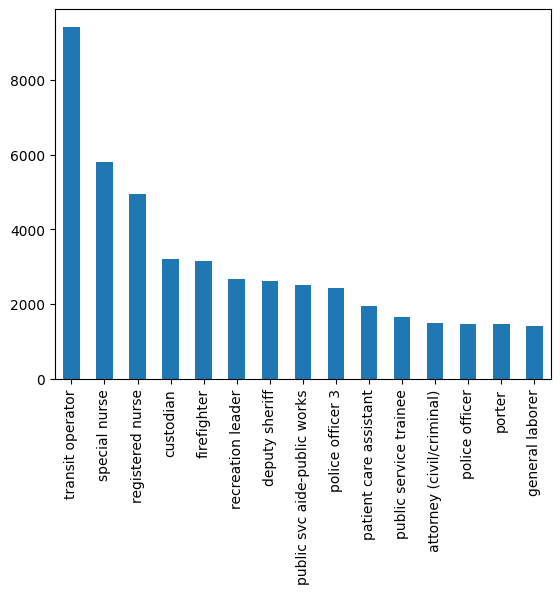

In [31]:
df['JobTitle'].value_counts().head(15).plot.bar()

In [32]:
df['Agency'].value_counts()

San Francisco    148606
Name: Agency, dtype: int64

we noticed that all jobs in San Francisco so we will delete this column

In [33]:
del df['Agency']

In [34]:
df['Year'].value_counts()

2014    38119
2013    37562
2012    36766
2011    36159
Name: Year, dtype: int64

<Axes: >

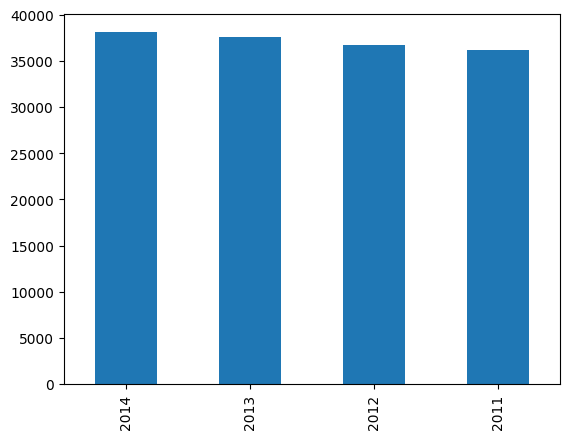

In [35]:
df['Year'].value_counts().plot.bar()

<Axes: xlabel='TotalPayBenefits', ylabel='Count'>

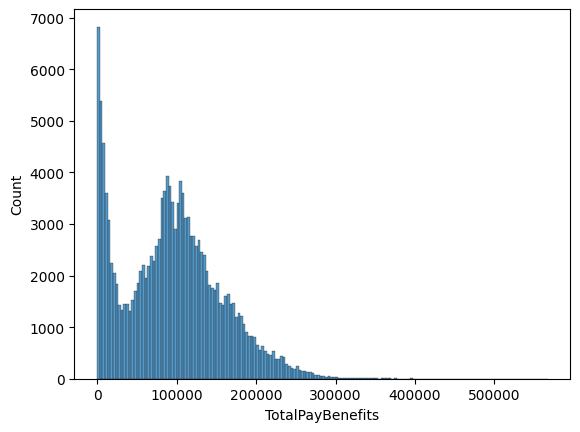

In [36]:
sns.histplot(df['TotalPayBenefits'])

In [37]:
df[df['TotalPayBenefits']>300000].sort_values(by='TotalPayBenefits',ascending=False)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,general manager-metropolitan transit authority,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011
1,2,GARY JIMENEZ,captain iii (police department),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011
110531,110532,David Shinn,deputy chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014
110532,110533,Amy P Hart,asst med examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014
110533,110534,William J Coaker Jr.,chief investment officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014
...,...,...,...,...,...,...,...,...,...,...
73032,73033,Gregory L Stewart,"captain, fire suppression",155174.47,72629.05,22979.88,50257.16,250783.40,301040.56,2013
36236,36237,Paul Chignell,captain 3,104404.02,0.00,172352.33,24078.34,276756.35,300834.69,2012
110621,110622,Ross B Mirkarimi,sheriff (sfers),215629.23,0.00,12937.66,71962.27,228566.89,300529.16,2014
73033,73034,Alexander Chen,senior physician specialist,200430.40,0.00,41705.68,57963.00,242136.08,300099.08,2013


<Axes: xlabel='BasePay', ylabel='Count'>

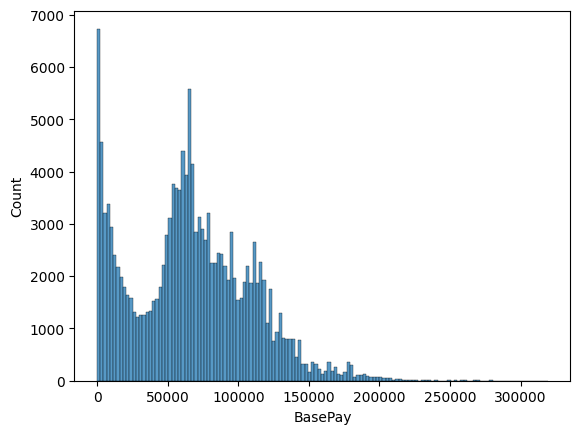

In [38]:
sns.histplot(df['BasePay'])

In [39]:
x=df[df['BasePay']<150000]
x.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,144176.000000,144176.000000,144176.000000,144176.000000,144176.000000,144176.000000,144176.000000,144176.000000
mean,74676.297282,62939.637731,5108.756475,3549.052224,18168.518659,71362.969051,89531.487710,2012.517666
std,42959.486440,38539.897529,11382.945974,7856.344393,16410.591508,46949.410234,58470.030048,1.118686
min,4.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37715.500000,31686.977500,0.000000,0.000000,0.000000,34097.335000,41508.902500,2012.000000
50%,75015.500000,63995.000000,0.000000,781.400000,22023.770000,69798.115000,90528.000000,2013.000000
75%,112351.250000,91118.070000,4798.432500,4132.477500,32876.980000,101884.777500,128534.607500,2014.000000
max,148654.000000,149994.000000,220909.480000,342802.630000,69196.170000,471952.640000,510732.680000,2014.000000


In [40]:
len(x[x['BasePay']<62639])/len(x)

0.48393630007768285

<Axes: ylabel='OvertimePay'>

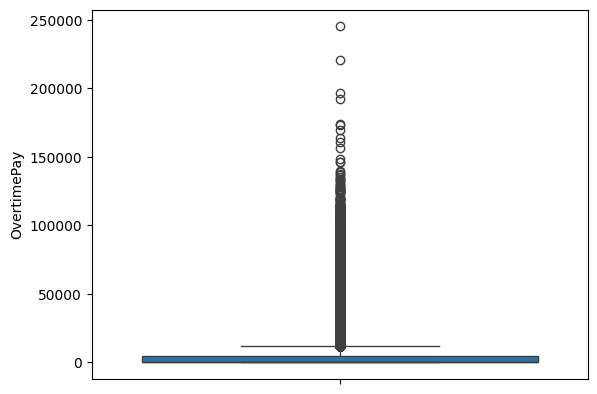

In [41]:
sns.boxplot(df['OvertimePay'])

In [42]:
len(df[df['OvertimePay']>10000])/len(df)

0.15386323567016136

<Axes: ylabel='OtherPay'>

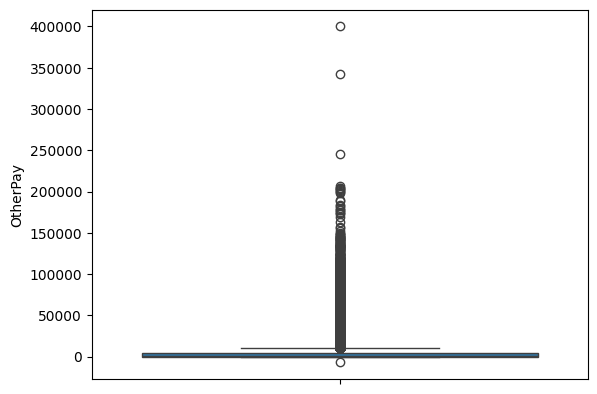

In [43]:
sns.boxplot(df['OtherPay'])

In [44]:
len(df[df['OtherPay']<=0])/len(df)

0.27975317281940165

In [45]:
len(df[(df['OtherPay']<5000) & df['OtherPay']>0])/len(df)

0.49992597876263406

In [46]:
len(df[df['OtherPay']>10000])/len(df)

0.1094706808607997

<Axes: ylabel='Benefits'>

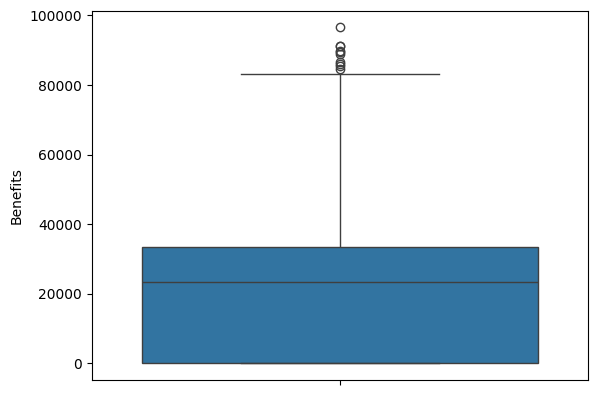

In [47]:
sns.boxplot(df['Benefits'])

In [48]:
len(df[(df['Benefits']<20000)&(df['Benefits']>0)])/len(df)

0.22346338640431745

In [49]:
len(df[(df['Benefits']<40000)&(df['Benefits']>20000)])/len(df)

0.42593165821030105

In [50]:
len(df[df['Benefits']>=40000])/len(df)

0.09561525106657874

In [51]:
df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=False).head(20)

JobTitle
chief investment officer                          436224.360000
chief, fire department                            408865.326667
general manager-metropolitan transit authority    399211.275000
gen mgr, public trnsp dept                        380696.440000
chief of police                                   375797.347500
dep dir for investments, ret                      355731.260000
adm, sfgh medical center                          347079.706667
controller                                        343061.140000
asst chf of dept (fire dept)                      342597.550556
dept head v                                       340643.507222
administrator, dph                                331564.035000
dep chf of dept (fire dept)                       326752.242857
deputy chief 3                                    324670.490952
assistant deputy chief 2                          317775.503636
manager, dept public health                       314138.620000
emergency medical svcs chief   

In [52]:
df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=True).head(20)

JobTitle
public safety communications technician                149.510000
board/commission member, group ii                      296.511628
bdcomm mbr, grp2,m=$25/mtg                             475.047742
board/commission member, group iii                     638.787879
special assistant xiv                                  673.800000
bdcomm mbr, grp3,m=$50/mtg                             973.106034
board/commission member, group v                      1195.904464
bdcomm mbr, grp5,m$100/mo                             1274.827470
special examiner                                      1577.529429
airport assistant deputy director, business admini    1927.500000
cashier 3                                             2074.600000
commissioner                                          2271.694348
commissioner no benefits                              2449.257015
assistant recreation supervisor                       2474.410000
public service aide-technical                         2774.270000
t

In [53]:
df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(20)

JobTitle
general manager-metropolitan transit authority    399211.275000
chief investment officer                          339653.700000
chief, fire department                            325971.683333
chief of police                                   313885.882500
deputy director of investments                    307899.460000
chief of department, (fire department)            302377.730000
gen mgr, public trnsp dept                        297769.413333
asst chf of dept (fire dept)                      281763.483889
deputy chief of department,(fire department)      279359.560000
dep dir for investments, ret                      278592.545000
adm, sfgh medical center                          270047.446667
deputy chief 3                                    268256.512857
assistant deputy chief 2                          267140.253636
controller                                        264750.753333
dept head v                                       264744.692778
dep chf of dept (fire dept)    

In [54]:
df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=True).head(20)

JobTitle
commissioner 16.700c, no pay                            25.760000
public safety communications technician                149.510000
bdcomm mbr, grp2,m=$25/mtg                             263.766129
board/commission member, group ii                      296.511628
board/commission member, group iii                     638.787879
special assistant xiv                                  673.800000
bdcomm mbr, grp3,m=$50/mtg                             706.698276
board/commission member, group v                      1195.904464
bdcomm mbr, grp5,m$100/mo                             1216.390602
special examiner                                      1409.830571
airport assistant deputy director, business admini    1927.500000
cashier 3                                             2074.600000
commissioner                                          2271.694348
commissioner no benefits                              2348.050522
assistant recreation supervisor                       2474.410000
p

In [55]:
df.groupby('JobTitle')['OvertimePay'].mean().sort_values(ascending=False).head(20)

JobTitle
wire rope cable maint sprv                          82446.923333
wire rope cable maintenance supervisor              66164.730000
trnst power line wrk sprv 2                         59259.306667
track maint wrk sprv 1                              50613.903478
battalion chief, fire suppress                      49453.051385
incident support specialist                         49203.798889
mech shop & equip supt                              47362.470000
transit power line sprv1                            46455.926842
asst chf of dept (fire dept)                        46024.222222
heating/ventilating inspector                       45997.238333
assistant inspector (police department)             45679.840000
senior power generation technician                  43284.801667
mechanical shop and equipment superintendent        43210.503333
battlion chief, fire suppressi                      41947.680833
track maintenance worker supervisor i               40922.130000
assistant chief 

In [78]:
len(df[df['OvertimePay']==0]['JobTitle'].unique())

1453

In [56]:
df.groupby('JobTitle')['BasePay'].mean().sort_values(ascending=True).head(20)

JobTitle
warehouse worker                                         0.000000
public safety communications technician                  0.000000
recreation director                                      0.000000
conversion                                               0.000000
assistant recreation supervisor                          0.000000
cashier 3                                                0.000000
bdcomm mbr, grp2,m=$25/mtg                             268.971976
board/commission member, group ii                      296.511628
board/commission member, group iii                     638.787879
special assistant xiv                                  673.800000
bdcomm mbr, grp3,m=$50/mtg                             719.372900
board/commission member, group v                      1183.561607
bdcomm mbr, grp5,m$100/mo                             1216.390602
commissioner 16.700c, no pay                          1288.000000
special examiner                                      1332.342714
a

In [57]:
df.groupby('JobTitle')['BasePay'].mean().sort_values(ascending=False).head(20)

JobTitle
chief, fire department                    304232.340000
gen mgr, public trnsp dept                297769.413333
chief of police                           296443.365000
chief of department, (fire department)    285262.000000
dep dir for investments, ret              276153.765000
adm, sfgh medical center                  265218.780000
controller                                263588.753333
executive contract employee               260358.618333
dept head v                               259590.712222
chief investment officer                  257340.000000
administrator, dph                        256730.060000
deputy director of investments            256576.960000
administrator, sfgh medical center        245124.440000
port director                             243609.232500
emergency medical svcs chief              232036.006667
dep chf of dept (fire dept)               224161.957143
deputy chief 3                            222799.069048
city attorney                          

In [58]:
df.groupby('JobTitle')['OtherPay'].mean().sort_values(ascending=False).head(20)

JobTitle
general manager-metropolitan transit authority        200092.125000
lieutenant ii (police department)                      98480.010000
chief investment officer                               82313.700000
assistant deputy chief 2                               82048.997273
assistant deputy chief ii                              75352.330000
deputy chief of department,(fire department)           74901.906667
deputy chief 3                                         56694.050952
traffic hearing officer                                53439.370000
lieutenant, bureau of fire prevention and public s     51365.950000
deputy director of investments                         51322.500000
sheriff (sfers)                                        50045.040000
wire rope cable maintenance supervisor                 47839.370000
manager, dept public health                            37473.895000
battalion chief, (fire department)                     36665.170889
wire rope cable maintenance mechanic   

In [117]:
# df.groupby('JobTitle')['OtherPay'].mean().sort_values(ascending=True).head(50)
df[df['OtherPay']>=100].groupby('JobTitle')['OtherPay'].mean().sort_values(ascending=True)

JobTitle
media programming specialist                         102.700000
senior morgue attendant                              110.560000
locksmith supervisor i                               111.750000
criminalist i                                        111.860000
media programming spec                               123.840000
                                                      ...      
assistant deputy chief ii                          75352.330000
assistant deputy chief 2                           82048.997273
chief investment officer                           82313.700000
lieutenant ii (police department)                  98480.010000
general manager-metropolitan transit authority    400184.250000
Name: OtherPay, Length: 1449, dtype: float64

In [60]:
df.groupby('JobTitle')['Benefits'].mean().sort_values(ascending=True).head(20)

JobTitle
zoo curator                          0.0
curator ii                           0.0
curator iii                          0.0
curator iv                           0.0
planner iv-environmental review      0.0
planner iv                           0.0
planner iii-environmental review     0.0
curator i                            0.0
planner iii                          0.0
planner ii                           0.0
planner i                            0.0
piledriver supervisor i              0.0
physical therapy aide                0.0
pest control specialist              0.0
personnel payroll representative     0.0
customer service agent supervisor    0.0
planner v                            0.0
plumber supervisor i                 0.0
plumber supervisor ii                0.0
court investigator                   0.0
Name: Benefits, dtype: float64

In [61]:
df.groupby('JobTitle')['Benefits'].mean().sort_values(ascending=False).head(20)

JobTitle
chief investment officer          96570.660000
gen mgr, public trnsp dept        82927.026667
chief, fire department            82893.643333
controller                        78310.386667
dep dir for investments, ret      77138.715000
adm, sfgh medical center          77032.260000
dept head v                       75898.814444
administrator, dph                74813.575000
emergency medical svcs chief      67464.830000
manager, dept public health       65501.050000
dep chf of dept (fire dept)       65346.107143
cfdntal chf atty 2,(cvl&crmnl)    64963.400000
dir emp relations div             64132.040000
dept head iv                      63867.488235
sheriff (sfers)                   62919.450000
chief of police                   61911.465000
special assistant 21              61453.430000
asst chf of dept (fire dept)      60834.066667
asst chf prob ofc, juv prob       60690.950000
board scty, mta                   59087.026667
Name: Benefits, dtype: float64

In [62]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [63]:
df.corr()['TotalPayBenefits']

<ipython-input-63-f68f7a5a056a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['TotalPayBenefits']


Id                 -0.091858
BasePay             0.942497
OvertimePay         0.467945
OtherPay            0.422400
Benefits            0.781946
TotalPay            0.977300
TotalPayBenefits    1.000000
Year                0.152224
Name: TotalPayBenefits, dtype: float64

<Axes: xlabel='TotalPayBenefits', ylabel='BasePay'>

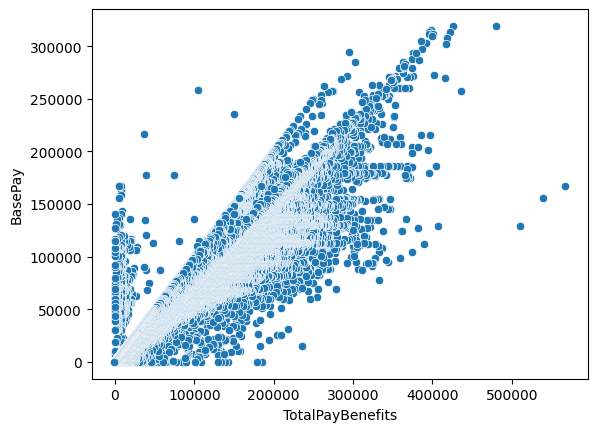

In [64]:
sns.scatterplot(data=df,x='TotalPayBenefits',y='BasePay')

<Axes: xlabel='TotalPayBenefits', ylabel='Benefits'>

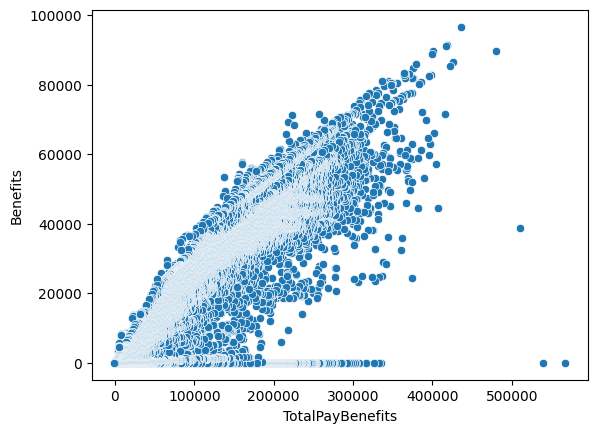

In [65]:
sns.scatterplot(data=df,x='TotalPayBenefits',y='Benefits')

<Axes: xlabel='TotalPayBenefits', ylabel='OvertimePay'>

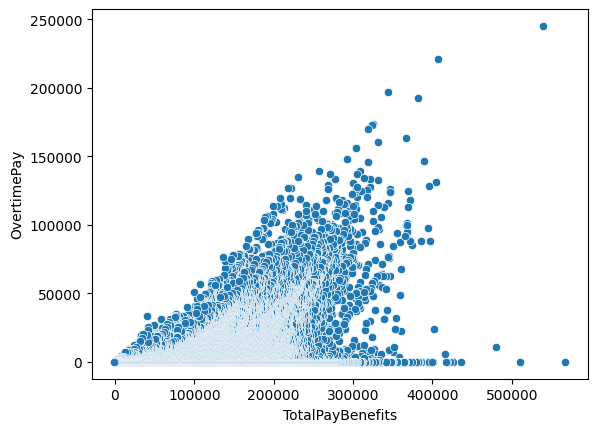

In [66]:
sns.scatterplot(data=df,x='TotalPayBenefits',y='OvertimePay')

<Axes: xlabel='TotalPayBenefits', ylabel='OtherPay'>

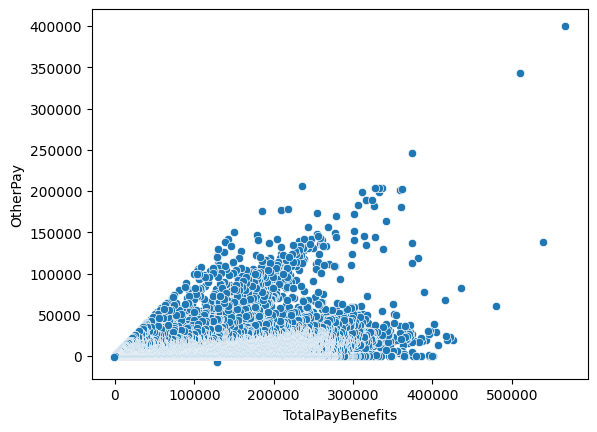

In [67]:
sns.scatterplot(data=df,x='TotalPayBenefits',y='OtherPay')

<Axes: xlabel='TotalPayBenefits', ylabel='TotalPay'>

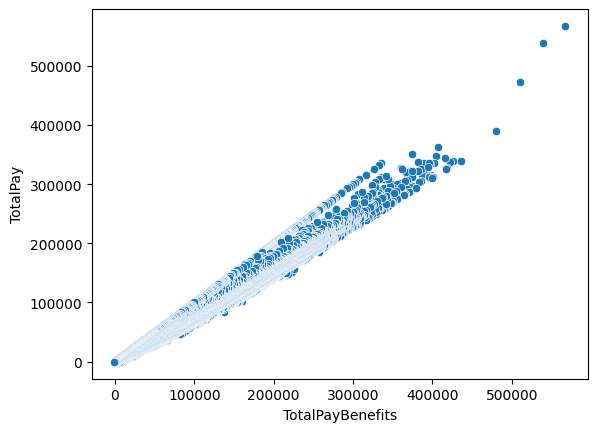

In [68]:
sns.scatterplot(data=df,x='TotalPayBenefits',y='TotalPay')

<Axes: xlabel='Year'>

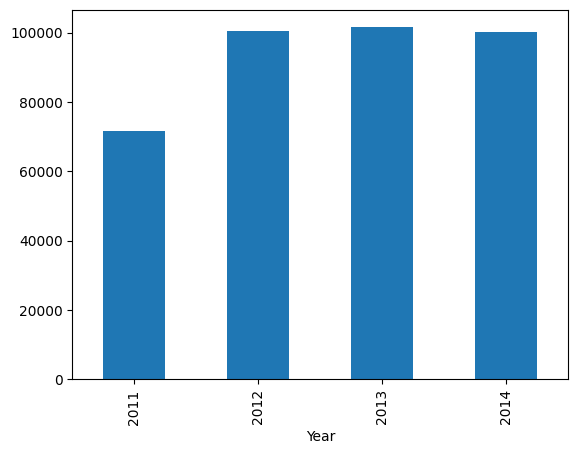

In [69]:
# df['year'] = pd.to_datetime(df['Year'], format='%Y')
df.groupby('Year')['TotalPayBenefits'].mean().plot.bar()

In [70]:
df[df['Year']==2011].groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=False)

JobTitle
general manager-metropolitan transit authority    399211.275000
deputy director of investments                    307899.460000
chief of department, (fire department)            302377.730000
deputy chief of department,(fire department)      279359.560000
executive contract employee                       277438.840000
                                                      ...      
board/commission member, group v                    1195.904464
special assistant xiv                                673.800000
board/commission member, group iii                   638.787879
board/commission member, group ii                    296.511628
public safety communications technician              149.510000
Name: TotalPayBenefits, Length: 1045, dtype: float64

In [71]:
df[df['Year']==2012].groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=False)

JobTitle
chief of police                  391362.300000
chief, fire department           386807.480000
gen mgr, public trnsp dept       376002.110000
executive contract employee      348109.670000
adm, sfgh medical center         339368.150000
                                     ...      
assistant recreation director      1868.065000
barber                             1443.005000
bdcomm mbr, grp5,m$100/mo          1245.078947
bdcomm mbr, grp3,m=$50/mtg          808.280909
bdcomm mbr, grp2,m=$25/mtg          291.113611
Name: TotalPayBenefits, Length: 1044, dtype: float64

In [72]:
df[df['Year']==2013].groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=False)

JobTitle
chief of police                 425815.280000
chief, fire department          422353.400000
dep dir for investments, ret    398421.670000
gen mgr, public trnsp dept      386168.490000
dep chf of dept (fire dept)     370406.320000
                                    ...      
bdcomm mbr, grp5,m$100/mo         1246.170727
bdcomm mbr, grp3,m=$50/mtg        1126.552927
animal control supervisor          982.510000
bdcomm mbr, grp2,m=$25/mtg         764.698605
special assistant 14                26.600000
Name: TotalPayBenefits, Length: 1041, dtype: float64

In [73]:
df[df['Year']==2014].groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=False)

JobTitle
chief investment officer       436224.360000
chief of police                418019.220000
chief, fire department         417435.100000
gen mgr, public trnsp dept     379918.720000
dep chf of dept (fire dept)    368006.350000
                                   ...      
cashier 3                        2074.600000
special examiner                 1342.750690
bdcomm mbr, grp5,m$100/mo        1335.416111
bdcomm mbr, grp3,m=$50/mtg        952.818095
bdcomm mbr, grp2,m=$25/mtg        345.417556
Name: TotalPayBenefits, Length: 996, dtype: float64


#summary for Job Titles

1.   there are about 30 employees whose Total Pay Benefits=0 or less !.
1.   50% of employess Total Pay Benefits less than 92k.
2.   just 289 employess whose Total Pay Benefits >300k.
2.   about 4.5k employees whose Base Pay more than 150k.
1.   according to the 144k employees whose Base Pay less than 150k
      about 48% from the them have Base Pay below the average which is 63k.
1.   50% from employees dont have OvertimePay.
1.   about 15% from employees  have OvertimePay more than 10k.
1.   about 28% from employees dont have OtherPay.
2.   about 50% from employees  have OtherPay less than 5k.
2.   about 22% from employees have OtherPay more than 5k.
2.   about 25% from employees dont have Benefits.
2.   about 22% from employees have Benefits less than 20k.
3.about 42.5% from employees have Benefits range from 20k to 40k.
14- about 9.5% from employees have Benefits more than 40k.


**There are 1632 job title**

**The most common job title**

1.   transit operator with count--> 9424
1.   special nursewith count--> 5791
2.   registered nurse with count--> 4955
2.   custodianwith count--> 3214
2.   firefighter with count--> 3153

**The top 5 job title with total pay benefits**


1.   chief investment officer with--> 436224
1.   chief, fire department with--> 408865
2.   general manager-metropolitan transit authority with-->399211
2.   gen mgr, public trnsp dept with--> 380696
2.   chief of police with--> 375797



**The lowest 5 job titles with total pay benefits**
1.   public safety communications technician with--> 149.510000
1.   board/commission member, group ii with--> 296.511628
2.   bdcomm mbr, grp2,m=$25/mtg with--> 475.047742
2.   board/commission member, group iii with--> 638.787879
2.   special assistant xiv with--> 673




**The top 5 job titles with total pay**
1.   general manager-metropolitan transit authority with--> 399211.275000
1.   chief investment officer with--> 339653.700000
2.   chief, fire department with--> 325971.683333
2.   chief of police with--> 313885.882500
2.   deputy director of investments with--> 307899.460000



**The lowest 5 job titles with total pay**
1.   commissioner 16.700c, no pay with--> 25.760000

1.   public safety communications technician with--> 149.510000

2.   bdcomm mbr, grp2,m=$25/mtg with--> 263.766129

2.   board/commission member, group ii with--> 296.511628

2.   board/commission member, group iii with--> 638.787879


**The top 5 job titles with overtime pay**

1.   wire rope cable maint sprv with--> 82446.923333
1.   wire rope cable maintenance supervisor with--> 66164.730000
1.   trnst power line wrk sprv 2 with--> 59259.306667
2.   track maint wrk sprv 1 with--> 50613.903478
2.   battalion chief, fire suppress with--> 49453.051385

**There are about 1453 job titles dont have overtime pay**

**The top 5 job titles with Base pay**
1.   chief, fire department with--> 304232.340000
1.   gen mgr, public trnsp dept with--> 297769.413333
1.   chief of police with--> 296443.365000
2.   chief of department, (fire department) with--> 285262.000000
2.   dep dir for investments, ret with--> 276153.765000

**The lowest 5 job titles with Base pay**


1.   bdcomm mbr, grp2,m=$25/mtg with--> 268.971976

2.   board/commission member, group ii with--> 296.511628
3.   board/commission member, group iii with--> 638.787879
4.   special assistant xiv with--> 673.800000
5.   bdcomm mbr, grp3,m=$50/mtg with--> 719.372900


**There are some job title dont have base pay like**
                                               
1.   warehouse worker                                         
1.   public safety communications technician                  
1.   recreation director                                      
2.   conversion
2.   assistant recreation supervisor                          
2.   cashier 3





**The top 5 job titles with other pay**

1.   general manager-metropolitan transit authority with--> 200092.125000
1.   lieutenant ii (police department) with--> 98480.010000
1.   chief investment officer with--> 82313.700000
2.   assistant deputy chief 2 with--> 82048.997273
2.   assistant deputy chief ii with--> 75352.330000


**There are about 1221 job title didnt have other pay**



**The top 5 job titles with Benefits**


1.   chief investment officer with--> 96570.660000
1.   gen mgr, public trnsp dept with--> 82927.026667
1.   chief, fire department with--> 82893.643333
2.   controller with--> 78310.386667
2.   dep dir for investments, ret with--> 77138.715000



# Employess Analysis

**Number of Employees --> 148606**

In [133]:
len(df['Id'].unique())

148606

The top 5 Empolyees with total pay with benefits

In [140]:
df[['Id','EmployeeName','JobTitle','TotalPayBenefits']].sort_values(by='TotalPayBenefits',ascending=False).head(5)

,Id,EmployeeName,JobTitle,TotalPayBenefits
0,1,NATHANIEL FORD,general manager-metropolitan transit authority,567595.43
1,2,GARY JIMENEZ,captain iii (police department),538909.28
110531,110532,David Shinn,deputy chief 3,510732.68
110532,110533,Amy P Hart,asst med examiner,479652.21
110533,110534,William J Coaker Jr.,chief investment officer,436224.36


The top 5 Empolyees with total pay

In [145]:
df[['Id','EmployeeName','JobTitle','TotalPay']].sort_values(by='TotalPay',ascending=False).head(5)

,Id,EmployeeName,JobTitle,TotalPay
0,1,NATHANIEL FORD,general manager-metropolitan transit authority,567595.43
1,2,GARY JIMENEZ,captain iii (police department),538909.28
110531,110532,David Shinn,deputy chief 3,471952.64
110532,110533,Amy P Hart,asst med examiner,390111.98
36159,36160,Gary Altenberg,"lieutenant, fire suppression",362844.66


The top 5 Empolyees with Base Pay

In [144]:
df[['Id','EmployeeName','JobTitle','BasePay']].sort_values(by='BasePay',ascending=False).head(5)

,Id,EmployeeName,JobTitle,BasePay
72925,72926,Gregory P Suhr,chief of police,319275.01
110532,110533,Amy P Hart,asst med examiner,318835.49
72929,72930,Robert L Shaw,"dep dir for investments, ret",315572.01
72926,72927,Joanne M Hayes-White,"chief, fire department",313686.01
72931,72932,Harlan L Kelly-Jr,executive contract employee,313312.52


The top 5 Empolyees with Overtime pay

In [147]:
df[['Id','EmployeeName','JobTitle','OvertimePay']].sort_values(by='OvertimePay',ascending=False).head(5)

,Id,EmployeeName,JobTitle,OvertimePay
1,2,GARY JIMENEZ,captain iii (police department),245131.88
36159,36160,Gary Altenberg,"lieutenant, fire suppression",220909.48
72964,72965,Whitney P Yee,deputy sheriff,196689.18
36163,36164,Frederick Binkley,emt/paramedic/firefighter,192424.49
110574,110575,Antonio B Santiago,deputy sheriff,173547.73


The top 5 Empolyees with other pay

In [148]:
df[['Id','EmployeeName','JobTitle','OtherPay']].sort_values(by='OtherPay',ascending=False).head(5)

,Id,EmployeeName,JobTitle,OtherPay
0,1,NATHANIEL FORD,general manager-metropolitan transit authority,400184.25
110531,110532,David Shinn,deputy chief 3,342802.63
36167,36168,John Goldberg,captain 3,245999.41
36888,36889,James Harrigan,chief atty1 (civil & criminal),206752.00
36195,36196,Stephen Tacchini,captain 3,204290.09


The top 5 Empolyees with benefits

In [149]:
df[['Id','EmployeeName','JobTitle','Benefits']].sort_values(by='Benefits',ascending=False).head(5)

,Id,EmployeeName,JobTitle,Benefits
110533,110534,William J Coaker Jr.,chief investment officer,96570.66
110534,110535,Gregory P Suhr,chief of police,91302.46
110535,110536,Joanne M Hayes-White,"chief, fire department",91201.66
110537,110538,John L Martin,dept head v,89772.32
110532,110533,Amy P Hart,asst med examiner,89540.23


# Good Luck!